In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données
file_path = "Concrete_Data - Sheet1.csv"
df = pd.read_csv(file_path)

# Séparer les features (X) et la target (y)
X = df.drop(columns=["Concrete compressive strength"])
y = df["Concrete compressive strength"]

# Diviser les données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialiser et entraîner le modèle
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05, #koll me nkabber fih tonkes el r
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.5,
    gamma=0.2,  # Réduction des branches inutiles
    reg_alpha=0.1,  # L1 regularization (réduction de la complexité)
    reg_lambda=0.1,  # L2 regularization
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Prédictions
y_pred = xgb_model.predict(X_test)

# Calcul des métriques
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f"📊 XGBoost : RMSE = {rmse:.2f}, R² = {r2:.3f}")


📊 XGBoost : RMSE = 4.48, R² = 0.922


c:\Users\21620\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


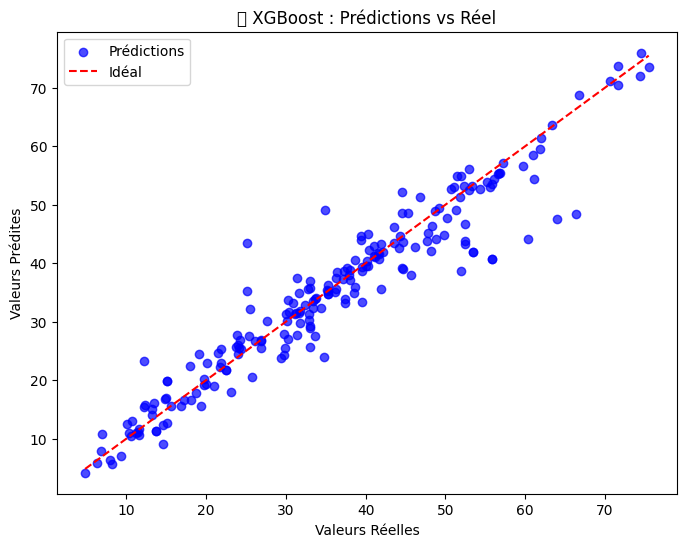

c:\Users\21620\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


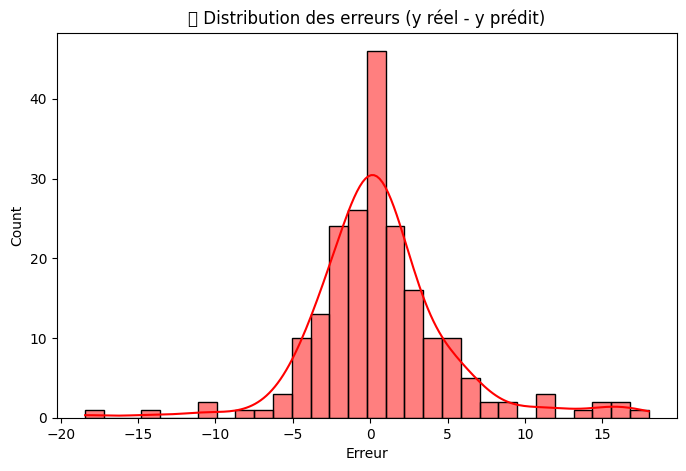

C:\Users\21620\AppData\Local\Temp\ipykernel_16712\1379368948.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(X.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
c:\Users\21620\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


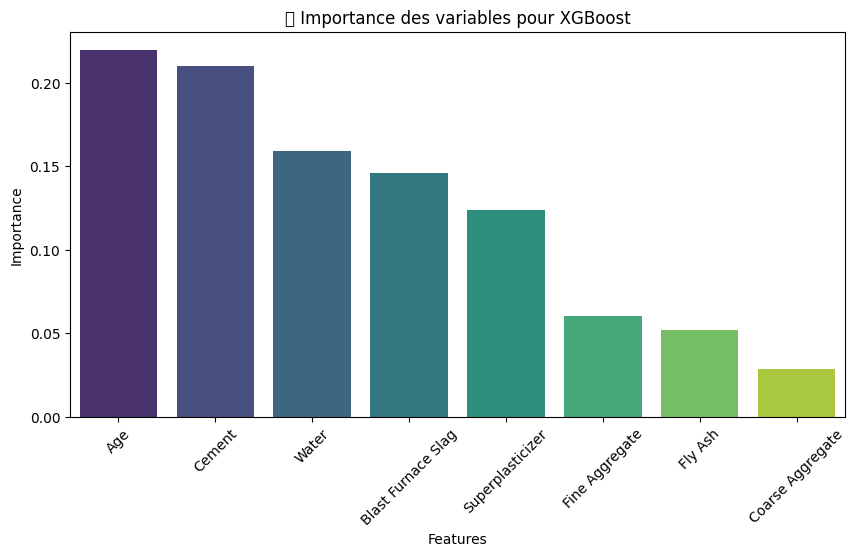

In [10]:

# 📈 7️⃣ Courbe : Valeurs réelles vs Prédictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Idéal")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("📌 XGBoost : Prédictions vs Réel")
plt.legend()
plt.show()

# 📊 8️⃣ Distribution des erreurs
errors = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True, color='red')
plt.xlabel("Erreur")
plt.title("📌 Distribution des erreurs (y réel - y prédit)")
plt.show()

# 🔍 9️⃣ Importance des features
feature_importances = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("📌 Importance des variables pour XGBoost")
plt.show()
